# Project Goal
> ## Find Drivers of Heart Disease or Attack

# Initial Hypothesis
> ## I believe that Diabetes and Smoking will be the best predictors on whether or not someone will have a heart attack

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Acquire
- Data acuired from Kaggle
- https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
- Each row represents a unique patient and their individual data


In [2]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# Prepare 

- There are 253680 rows and 11 columns
- View/correct datatypes
- changed age from integers to correct age bins
- There were no null values
- Visualize full dataset for univariate exploration (histograms and boxplots)
    - Handle outliers
- I got rid of the outliers in BMI by getting rid of the top 1 percent
- verified datatypes
- made all of the column names lower case
- split the data on the target variable heart disease or attack
- scaled my data with a min max scaler

In [3]:
df, second_list, the_age, the_list, target, train, validate, test , train_scaled, validate_scaled, test_scaled = wrangle.condenced_prepate(df)

In [5]:
df.head()

,heartdiseaseorattack,highbp,highchol,bmi,smoker,diabetes,hvyalcoholconsump,menthlth,physhlth,sex,age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,18.0,15.0,female,60 to 64
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,female,50 to 54
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,30.0,30.0,female,60 to 64
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,female,70 to 74
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,3.0,0.0,female,70 to 74


# Univariate Exploration

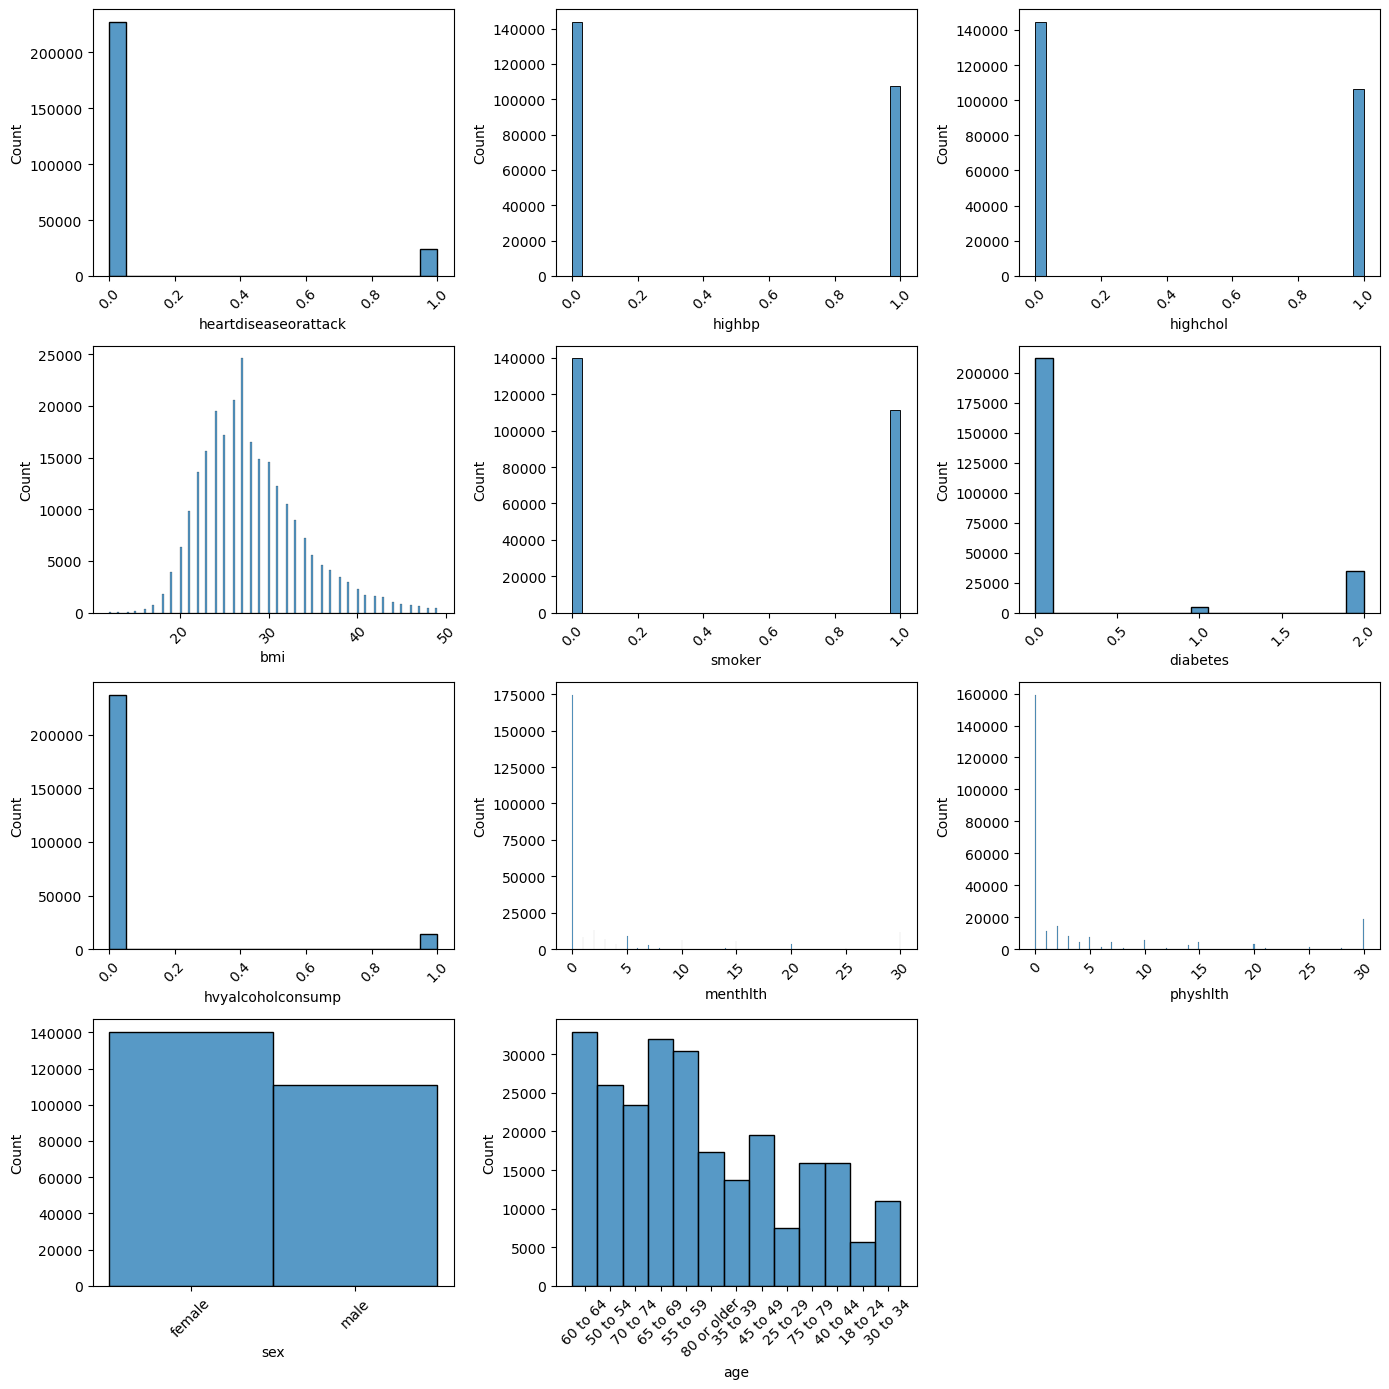

In [6]:
wrangle.univariate_visual(df)

# Bivariate Exploration
> ## Catagorical variables
    - highbp
    - highchol
    - diabetes
    - hvyalcoholconsump
    - smoker
    - sex

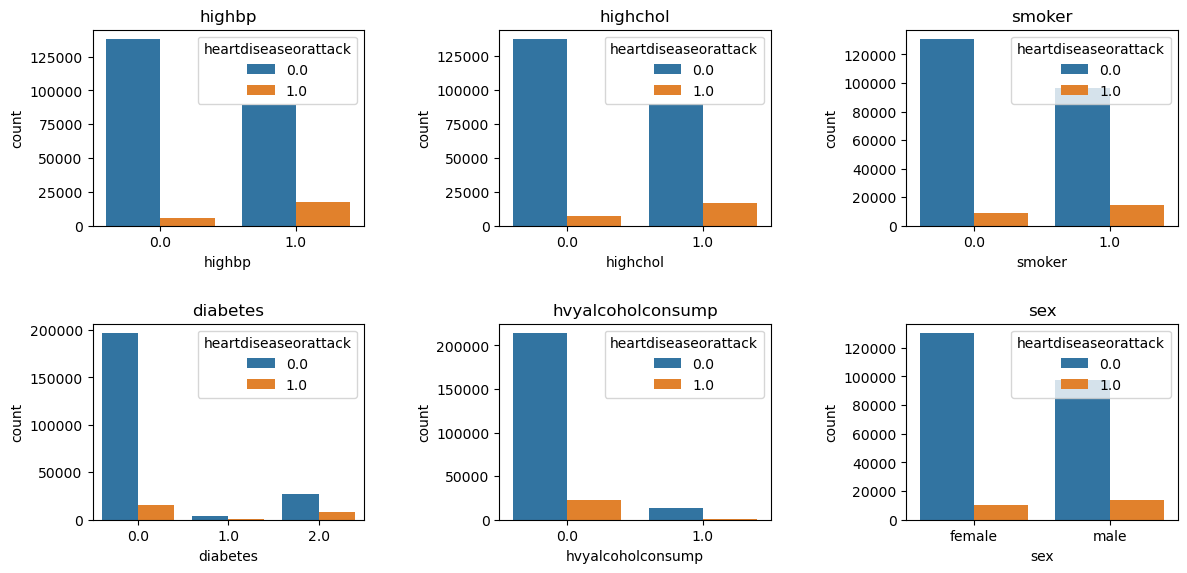

In [7]:
wrangle.bivariate_catagorical(df, the_list)

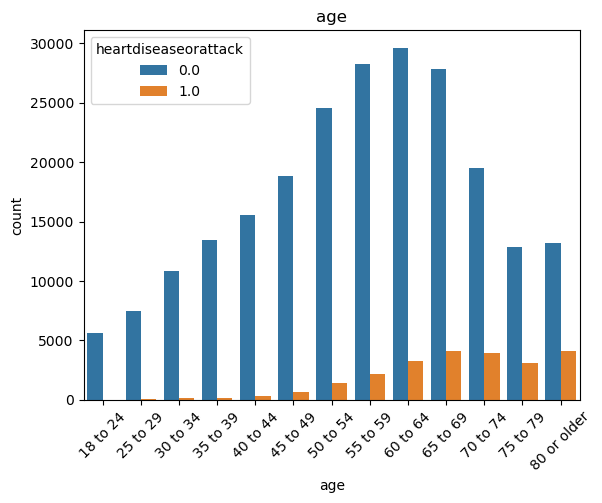

In [8]:
wrangle.age_visual(df, the_age)

# Chi2 Stats Tests

> Here I ran Chi2 tests on the different catagorical variables towards the target variable
<br>
<br>
> $H_0$: There is no statistical significance between my seleced features and heart disease and attack
<br>
<br>
> $H_\alpha$: There is statistical significance between my seleced features and heart disease and attack
<br>
<br>
$\alpha$: 0.05

In [9]:
chi2_df1 = wrangle.chi2_test(df, target, the_list)
chi2_df2 = wrangle.chi2_test(df, target, [the_age])
wrangle.combine_two_dataframes(chi2_df1, chi2_df2)

,feature,chi2,p,degf,expected
1,highbp,11015.047652,0.000000e+00,1,"[[130384.37387360483, 97148.62612639517], [135..."
2,highchol,8226.244926,0.000000e+00,1,"[[131095.60419777568, 96437.39580222432], [135..."
3,smoker,3311.019131,0.000000e+00,1,"[[126642.48694516452, 100890.51305483548], [13..."
4,diabetes,8193.524268,0.000000e+00,2,"[[192155.4070472618, 4124.229854300311, 31253...."
5,hvyalcoholconsump,211.350651,6.969416e-48,1,"[[214678.30466326608, 12854.695336733921], [22..."
6,sex,1889.270265,0.000000e+00,1,"[[127114.5264342002, 100418.4735657998], [1318..."
1,age,13715.206630,0.000000e+00,12,"[[5127.20051526482, 6790.66405052303, 9901.956..."


# Bivariate Exploration
> ## Continuous variables
    - bmi
    - menthlth
    - physhlth

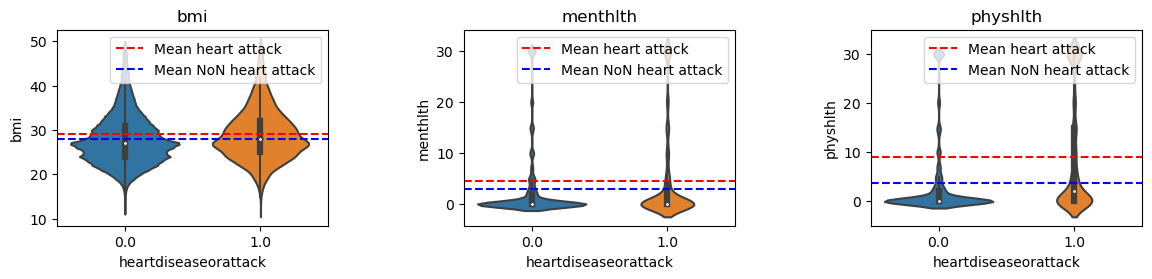

In [10]:
wrangle.bivariate_continuous(df, second_list)

# Comparison Of Means Stats Test
> Here I ran two sample t tests on the different continuous variables towards the target variable
<br>
<br>
> $H_0$: The means of my seleced features are the same
<br>
<br>
> $H_\alpha$: The means of my seleced features are not the same
<br>
<br>
$\alpha$: 0.05

In [11]:
wrangle.comparison_of_means(df, second_list)

,Category name,P value
0,bmi,2.489162e-197
0,menthlth,5.522723e-227
0,physhlth,0.000000e+00


# Extra Analysis
>- Diabetes
>- Alcohol consumption
>- Sex

In [12]:
the_df = wrangle.extra_analysis(df)
the_df

,No heart problems,Heart problems,Percent heart problems
No diabetes,196862,15224,7.178220
Pre diabetes,3898,654,14.367311
Has diabetes,26773,7722,22.385853
Alcohol free,214187,22758,9.604761
Heavy alcohol,13346,842,5.934593
Male,97262,13572,12.245340
Female,130271,10028,7.147592


# Bivariate Exploration Summary
> - More people with high blood pressure had heart disease or a heart attack more than those that did not
> - More people with high cholestreol had heart disease or a heart attack than those that did not
> - More people that smoked had heart disease or a heart attack than those that did not
> - People with diabeties had heart attacks 15% more than those that didn't have diabetes
> - You are 5% more likely to have a heart attack if you are a male
> - People who consumed heavy amounts of alcohol had heart disease or heart attacks 6.81% more than those that did not consume heavy amounts of alcohol

> - People in higher age brackets have a higher percentage of people who have had a heart disease or attack
> - People who have had heart attacks had more days of bad physical health
> - People who have had heart attacks had more days of bad mental health
> - People who have had heart attack and people who didn't have heart attacks have a similar bmi mean


## Means Test Summary
> - Bmi p value is less than alpha meaning we reject the null
> - Menthlth p value is less than alpha meaning we reject the null
> - Physhlth p value is less than alpha meaning we reject the null

## Chi2 Test Summary
> - Highbp p value is less than alpha meaning we reject the null
> - Highchol p value is less than alpha meaning we reject the null
> - Smoker p value is less than alpha meaning we reject the null
> - Diabetes p value is less than alpha meaning we reject the null
> - Hvyalcoholconsump p value is less than alpha meaning we reject the null
> - Sex p value is less than alpha meaning we reject the null
> - Age p value is less than alpha meaning we reject the null

# Multivariate exploration

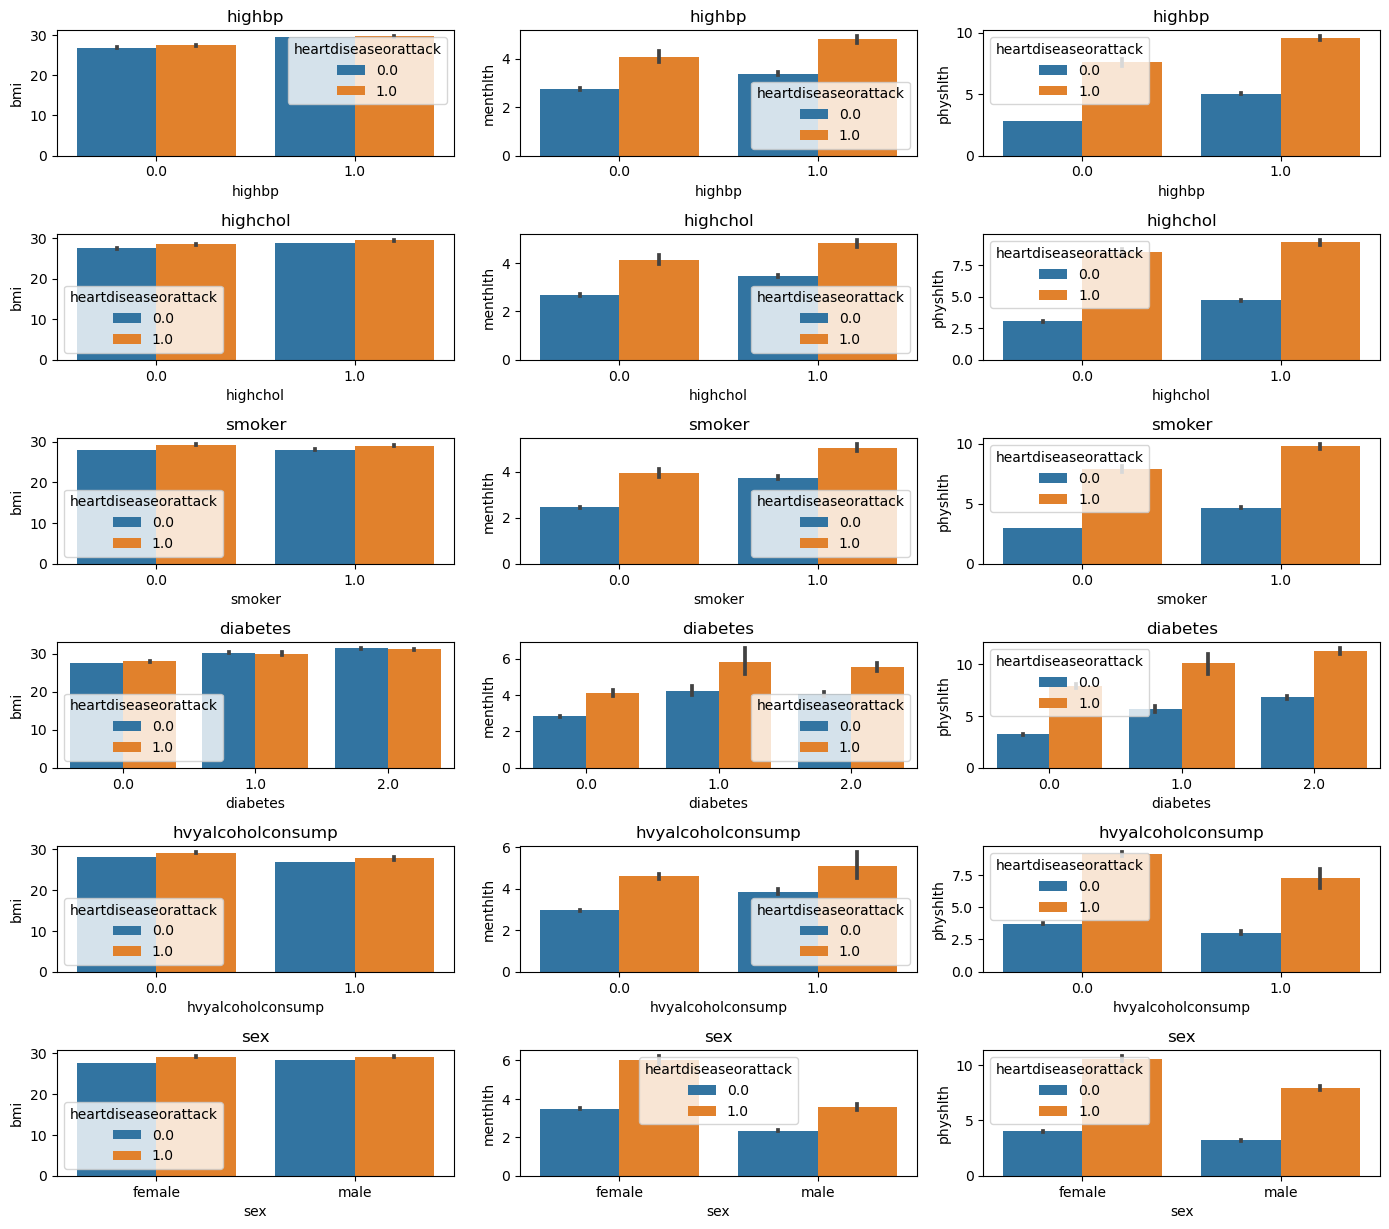

In [13]:
wrangle.multivariate_exploration_charts(df, the_list, second_list)

# Multivariate Exploration Summary
>** High blood pressure and high cholestreol dependent on a doctor telling the patient if they have them. If the patient does not see a doctor they might still have high blood pressure or cholestreol


>- Out of the people who do have high blood pressure have higher bmi than those that do not have high blood pressure
>- Out of the people who have had heart problems the ones with high blood pressure seem to have more bad mental health days
>- Out of the people who did have heart problems the ones with high blood pressure had more bad physical health days
>- Out of the people who did have heart problems the ones who had high cholestreol had more bad mental health days
>- Out of the people who did have heart problems the ones who had high cholestreol had more bad physical health days
>- Out of the people who did have heart problems the ones who smoked had more bad mental health days
>- Out of the people who did have heart problems the ones who smoked had more bad physical health days
>- Out of the people who did have heart problems the ones who didn't consume heavy amounts of alcohol had a higher bmi on average
>- Out of the peopple who did have heart problems the ones who consumed heavy amounts of alcohol had more bad mental health days than those that didn't consume heavy amounts of alcohol
>- Out of the peopple who did have heart problems the ones didn't consume heavy amounts of alcohol tended to have more bad physical health days
>- Out of the people who did have heart problems females had more bad mental health days
>- Out of the people who did have heart problems females had more bad physical health days

# Modeling
- I will use my accuracy evaluation metric
- people who haven't had a heart attack or disease makeup 90.58% of the data

- by guessing people who havent had a heart attack or disease one could achieve an accuracy of 90.58% <br>
- 90.58% will be the baseline accuracy I use for this project <br>
<br>
- I will be evaluating models developed using four different model types and various hyperparameter configurations 

* Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

In [14]:
the_df, testRF = wrangle.load_all_csv()
the_df

,model_train,train_predict,validate_predict,n_neighbors,difference,C,max_depth
20,KNeighborsClassifier,0.907548,0.904920,20,0.002628,NaN,NaN
1,LogisticRegression,0.905577,0.905412,NaN,0.000164,0.01,NaN
9,RandomForestClassifier,0.905977,0.905925,NaN,0.000053,NaN,9
1,DecisionTreeClassifier,0.905813,0.905826,NaN,0.000013,NaN,1


# Unseen data on random forest model

In [15]:
testRF

,model_train,baseline,max_depth
0,RandomForestClassifier,0.905814,max_depth
1,RandomForestClassifier,0.906000,9


# Modeling Summary
> * Established baseline to beat at: 90.58%
> * Ran through multiple different classification models.
> * Random Forest at max_depth=9 performed the best with an accuracy score of 90.59%.
> * Ran final model on test data set. Result: 90.6%

# Conclusion
> * All of the features sent through the models were statistically significant
> * My top model performed beat baseline by .02 %
> * Some of the columns are dependent on whether or not the patient has seen a doctor

# Recommendations
> * I would not recommend using the model because it did not beat baseline by a significant amount


# Next Steps
> * Create new columns out of existing columns to use during the modeling phase
> * Send in different combinations of columns into the different models
> * Gather more data to make the models even more accurate
> * talk to the author of the dataset to get more information on some of the columns